In [ ]:
# for modules exposure
import sys

sys.path.append("../")

for line in sys.path:
     print(line)

In [27]:
import numpy as np
import h5py
import s3fs

In [28]:
filename="goesrplt_CPL_ATB_L1B_17930_20170427.hdf5"
coord_type="Date"
data_type="ATB_1064"

In [29]:
def get_file_path(filename):
    bucket_src = "fcx-raw-data-temp"
    # bucket_src = os.environ.get('SOURCE_BUCKET_NAME')
    path_to_file="CPL/data/L1B"
    # path_to_file = os.environ.get('PATH_TO_FEGS')
    return f"s3://{bucket_src}/{path_to_file}/{filename}"

s3path=get_file_path(filename)
s3path

's3://fcx-raw-data-temp/CPL/data/L1B/goesrplt_CPL_ATB_L1B_17930_20170427.hdf5'

In [30]:
fs = s3fs.S3FileSystem(anon=False)

In [31]:
with fs.open(s3path) as cplfile:
    with h5py.File(cplfile, 'r') as DG: # DataGroup
        print(list(DG.keys()))
        print("-----------------")
        print(DG['Hour'].shape)
        print(DG['Minute'].shape)
        print(DG['Second'].shape)
        print("-----------------")
        print(DG['ATB_1064'].shape)
        print(DG['ATB_355'].shape)
        print(DG['ATB_532'].shape)
        print("-----------------")

['ATB_1064', 'ATB_1064_PERP', 'ATB_355', 'ATB_532', 'Bin_Alt', 'Bin_Width', 'Cali_1064', 'Cali_1064_Err', 'Cali_355', 'Cali_355_Err', 'Cali_532', 'Cali_532_Err', 'Date', 'Dec_JDay', 'Depol_Ratio_1sec', 'End_JDay', 'Frame_Top', 'Hori_Res', 'Hour', 'Latitude', 'Longitude', 'Minute', 'Mole_Back', 'NumBins', 'NumChans', 'NumRecs', 'NumWave', 'Plane_Alt', 'Plane_Heading', 'Plane_Pitch', 'Plane_Roll', 'Pressure', 'Project', 'RH', 'Saturate', 'Second', 'Solar_Azimuth_Angle', 'Solar_Elevation_Angle', 'Start_JDay', 'Temperature']
-----------------
(14924,)
(14924,)
(14924,)
-----------------
(14924, 900)
(14924, 900)
(14924, 900)
-----------------


In [32]:
necessary_dataset = {}

with fs.open(s3path) as cplfile:
    with h5py.File(cplfile, 'r') as DG: # DataGroup
        Hour_ds = DG['Hour']
        # Hour = Hour_ds[0: Hour_ds.shape[0]]
        Hour = Hour_ds[Hour_ds.shape[0]-10: Hour_ds.shape[0]]

        Minute_ds = DG['Minute']
        # Minute = Minute_ds[0: Minute_ds.shape[0]]
        Minute = Minute_ds[Minute_ds.shape[0]-10: Minute_ds.shape[0]]

        Second_ds = DG['Second']
        Second = Second_ds[Second_ds.shape[0]-10: Second_ds.shape[0]]

        ATB_1064_ds = DG['ATB_1064']
        # ATB_1064 = ATB_1064_ds[0:ATB_1064_ds.shape[0]]
        ATB_1064 = ATB_1064_ds[0:10]

        necessary_dataset = {
            "Hour": Hour,
            "Minute": Minute,
            "Second": Second,
            "ATB_1064": ATB_1064}

print(necessary_dataset)

{'Hour': array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int16), 'Minute': array([57, 57, 57, 57, 57, 57, 57, 57, 57, 57], dtype=int16), 'Second': array([48, 49, 50, 51, 52, 53, 54, 55, 56, 57], dtype=int16), 'ATB_1064': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.31028854e-04, -1.63681285e-04,  1.31227668e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.74197444e-05,  6.71766255e-05, -1.72036679e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.30236246e-04,  1.51037678e-05,  1.51451518e-05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.77456185e-04,  4.84254784e-05,  4.77775024e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.15943674e-04,  2.16955965e-04, -2.42713032e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.25732582e-05,  5.25745330e-05, -1.76745195e-04]])}


In [33]:
necessary_dataset['ATB_1064'][10-1][900-1]

-0.0001767451951136467

Data for a given second.

In [34]:
necessary_dataset = {}

with fs.open(s3path) as cplfile:
    with h5py.File(cplfile, 'r') as DG: # DataGroup
        Hour_ds = DG['Hour']
        Hour = Hour_ds[0: Hour_ds.shape[0]]
        # Hour = Hour_ds[Hour_ds.shape[0]-10: Hour_ds.shape[0]]

        Minute_ds = DG['Minute']
        Minute = Minute_ds[0: Minute_ds.shape[0]]
        # Minute = Minute_ds[Minute_ds.shape[0]-10: Minute_ds.shape[0]]

        Second_ds = DG['Second']
        Second = Second_ds[0: Second_ds.shape[0]]
        # Second = Second_ds[Second_ds.shape[0]-10: Second_ds.shape[0]]

        ATB_1064_ds = DG['ATB_1064']
        ATB_1064 = ATB_1064_ds[0:ATB_1064_ds.shape[0]]
        # ATB_1064 = ATB_1064_ds[0:10]

        necessary_dataset = {
            "Hour": Hour,
            "Minute": Minute,
            "Second": Second,
            "ATB_1064": ATB_1064}

print(necessary_dataset)

{'Hour': array([ 6,  6,  6, ..., 10, 10, 10], dtype=int16), 'Minute': array([49, 49, 49, ..., 57, 57, 57], dtype=int16), 'Second': array([14, 15, 16, ..., 55, 56, 57], dtype=int16), 'ATB_1064': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.31028854e-04, -1.63681285e-04,  1.31227668e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.74197444e-05,  6.71766255e-05, -1.72036679e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.30236246e-04,  1.51037678e-05,  1.51451518e-05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.25483335e-04,  2.12522765e-04, -1.53829056e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.30143069e-04, -5.47366768e-04, -2.58829414e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.91644428e-04,  6.33093007e-04, -9.01607567e-05]])}


In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

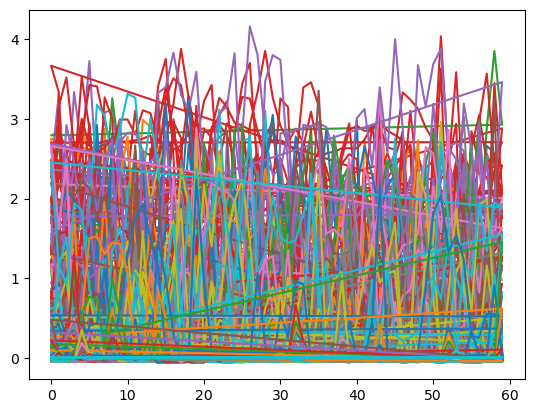

In [36]:
plt.plot(necessary_dataset['Second'], necessary_dataset['ATB_1064'])
plt.show()